# Objective is to classify whether or not a user will purchase the product or not if ad is shown to him based on user's age and salary

In [296]:
import pandas as pd   # for reading the csv file
import numpy as np     # for dea;ing with n-dimensional matrices
import matplotlib.pyplot as plt       # for plotting the results
from IPython.display import clear_output  
from scipy.stats import norm

In [297]:
dataset = pd.read_csv("Social_Network_Ads.csv")   

dataset=dataset.drop(['User ID','Gender'],axis=1)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [298]:
dataset.isna().sum()   #checking the presence of NaN values in the dataset

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Plotting the datapoints

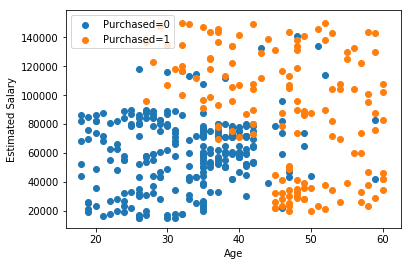

In [299]:
plt.scatter(dataset[dataset['Purchased']==0]['Age'],dataset[dataset['Purchased']==0]['EstimatedSalary'],label="Purchased=0")
plt.scatter(dataset[dataset['Purchased']==1]['Age'],dataset[dataset['Purchased']==1]['EstimatedSalary'],label="Purchased=1")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

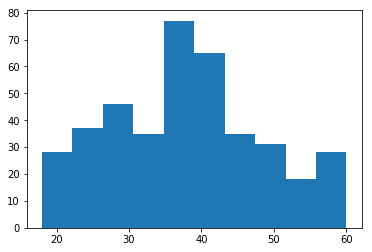

In [300]:
plt.hist(dataset['Age'])

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

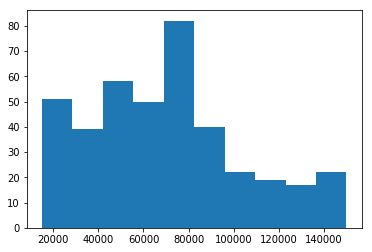

In [301]:
plt.hist(dataset['EstimatedSalary'])

# selecting Y, 

In [302]:
Y=(np.array(dataset['Purchased'])).reshape(len(dataset),1)

# Naive Bayes Classification Algorithm

### $$  P( class=1 | feature=x) = \frac{P( feature=x | class=1 )  * P( class=1)} {[(P( feature=x | class=1 )  * P( class=1))+(P( feature=x | class=1 )  * P( class=1))]}  $$

##  where
###          P( class=1 | feature=x) is our Posterior Probabilty of User Purchasing the product provided feature=x 
###                       if P( class=1 | feature=x)> P( class=0 | feature=x), class_predicted=1 elseclass_predicted=0
###          P( feature=x | class=1 ) is our likelihood probability which will be calculed from the data distribution itself. If we random pick up an user from the set of user for whom Purchase=1, then  P( age=x | class=1 )  is the probabilty that the feature value = x.
###          P(class=1) is the Prior Probablity and it can be calculated as 
## $$   P(class=1)=  \frac{numberOfRowsWith(Purchase==1)}{TotalNumberOfRows} $$  

## calculating prior probabilities:

In [303]:
prior_class0=len(dataset[dataset['Purchased']==0])/len(dataset)
prior_class1=len(dataset[dataset['Purchased']==1])/len(dataset)

# 1. taking Estimated as the feature,
## Since Age is having the maximum correlation with the target.  So we will be using Age to classify when or not the user will purchase the product

In [305]:

X1=(np.array(dataset['EstimatedSalary'])).reshape(len(dataset),1)


# normalisation

In [307]:
X1=(X1-np.mean(X))/np.std(X1)

## calculating likelihood probabilities , P( age=x | class=1or0 )
### Since our Age feature is following some distribution closer to Gaussian Distribution
### $$  P(age=x | class=1) = \frac{1}{{\sigma \sqrt {2\pi } }} e^ -\frac{(x-\mu)^2}{2 \sigma^2 } $$
###  where mu and sigma are the mean and standard deviations of ages feature of user with class(Purchase)=1


In [308]:
def norm_pdf(x,mean,std):
    return (1/(((2*3.14)**.5)*std))*np.exp(-(((x-mean)**2)/(2 * std**2)))

## calculation mean and std for class=1 and class=0

In [309]:
# training part
mean_class0 = np.mean(X1[Y==0])
mean_class1 = np.mean(X1[Y==1])

std_class0 = np.std(X1[Y==0])
std_class1 = np.std(X1[Y==1])


## calculating Posterior Probablities

In [325]:
def posterior_normal(example,mean_class0,std_class0,mean_class1,std_class1):   
    numerator0= norm_pdf(example,mean_class0,std_class0)*prior_class0
    numerator1= (norm_pdf(example,mean_class1,std_class1)*prior_class1)
    return numerator0/(numerator0+numerator1)  ,  numerator1/(numerator0+numerator1)



## testing :  
### if for an example age, posterior1>posterior0: then model will predict Purchase=1 else Purchase=0

In [328]:
def predict_using_normal(xtest,ytest):
    y_predicted=[]
    for i in range(len(X)):
        posterior0,posterior1=posterior_normal(xtest[i],mean_class0,std_class0,mean_class1,std_class1)
        if posterior0>posterior1:
            y_predicted.append(0)
        else:
            y_predicted.append(1)
    y_predicted=(np.array(y_predicted)).reshape(len(y_predicted),1)
    return y_predicted



def accuracy(y_predicted,y_actual):
    return 100*(len(Y[y_predicted==y_actual])/len(y_actual))
    

## On using Age as feature and assuming it to be Norally Distributed

In [329]:
print("Accuracy is",accuracy(predict_using_normal(X1,Y),Y),"%",)

Accuracy is 77.5 %


(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

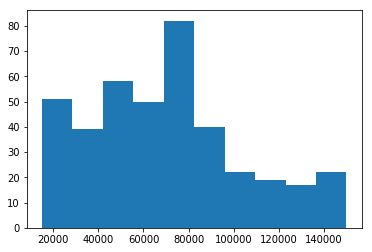

In [330]:
plt.hist(dataset['EstimatedSalary'])

# 2. taking EstimatedSalary as the feature,
## Since EstimatedSalary is having a good correlation with the target.  So we will be using EstimatedSalary to classify when or not the user will purchase the product

In [342]:
X2=(np.array(dataset['EstimatedSalary'])).reshape(len(dataset),1)

### scaling X2 by dividing it with 1000 so that factorial function can work properly

In [348]:
X2=X2/1000

## calculating likelihood probabilities , P( age=x | class=1or0 )
### Since our Estimated Salary feature is following some distribution closer to Poisson Distribution
# $$  P(EstimatedSalary=x | class=1) = \frac{e^\lambda  \lambda^x}{x!}   $$
###  where lambda is the mean of Estimated Salaries of users with class(Purchase)=1


In [349]:
def poisson_pdf(x,mean):
    return (np.exp(-mean) * (mean**x))/(np.math.factorial(x))

# calculation mean for class=1 and class=0

In [350]:
lambda0 = np.mean(X2[Y==0])
lambda1 = np.mean(X2[Y==1])


## calculating posterior probabilities

In [351]:
def posterior_poisson(example,lambda0,lambda1):   
    numerator0= poisson_pdf(example,lambda0)*prior_class0
    numerator1= poisson_pdf(example,lambda1)*prior_class1
    return numerator0/(numerator0+numerator1)  ,  numerator1/(numerator0+numerator1)

In [346]:
def predict_using_poisson(xtest,ytest):
    y_predicted=[]
    for i in range(len(xtest)):
        posterior0,posterior1=posterior_poisson(xtest[i],lambda0,lambda1)
        if posterior0>posterior1:
            y_predicted.append(0)
        else:
            y_predicted.append(1)
    y_predicted=(np.array(y_predicted)).reshape(len(y_predicted),1)
    return y_predicted


## On using EstimateSalary as feature and assuming it to be Poisson Distributed,

In [353]:
print("Accuracy is",accuracy(predict_using_poisson(X2,Y),Y),"%",)

Accuracy is 64.25 %
